#로지스틱 회귀

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish.head()
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
print(pd.unique(fish['Species'])) #어떤 종이 있는지 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() #넘파이 배열로 변환해준다

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target=fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)
#훈련데이터 테스트데이터 분할

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
#표준 정규화로 데이터를 전처리
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5])) #5개까지 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
lr=LogisticRegression(C=20, max_iter=1000) #C: 정규화 정도  max_iter: solver의 반복 횟수 설정
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5]) #예측한 비율의 정도를 보여준다

print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
decision=lr.decision_function(test_scaled[:5])

print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba =softmax(decision, axis=1) #소프트맥스 함수를 적용해 0에서 1사이의 값으로 만들어준다
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
#경사하강법을 이용해서 훈련한다
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
sc=SGDClassifier(loss='log_loss', random_state=42)

train_score=[]
test_score=[]

classes=np.unique(train_target)

In [ ]:
#각 에포크 마다의 훈련 점수와 테스트 점수를 저장한다
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

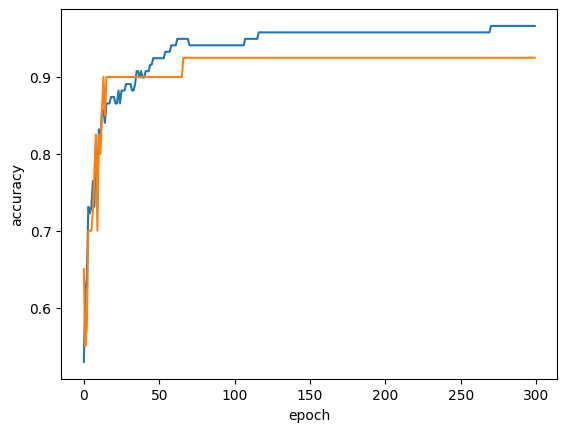

In [ ]:
# 그래프를 분석해보면, 훈련 점수가 테스트 점수를 상회하기 시작하는 순간부터 과대적합이 일어나기 때문에
# 그 전에 에포크를 종료해 최적의 모델을 만든다
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
#로그 손실로 설정해 100번 반복해 훈련한다
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
#힌지 손실로 설정한다
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 결정트리 모델

In [ ]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
#표준스케일링을 통해 데이터를 전처리해준다
ss=StandardScaler()
ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#결정트리모델 훈련과 평가
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


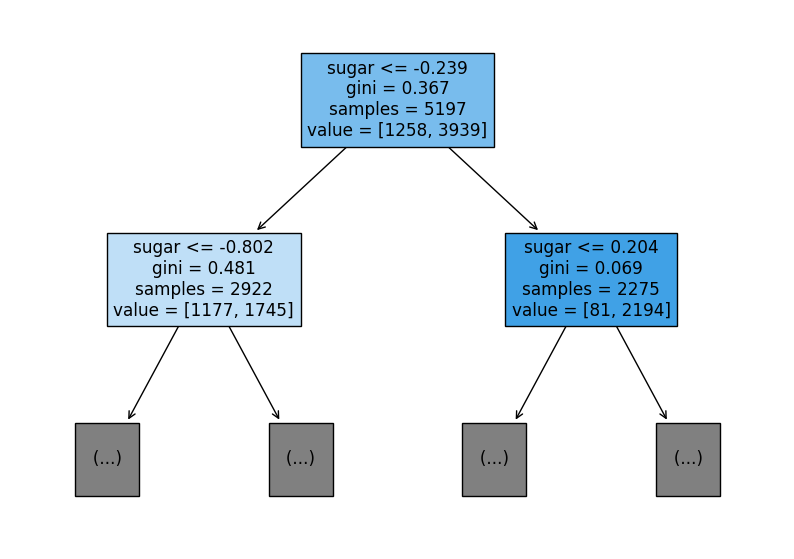

In [ ]:
from sklearn.tree import plot_tree
#결정트리가 어떤 모양을 띄고 있는지 그래프 형식으로 출력해준다
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
#최대 깊이가 3인 결정트리모델을 훈련시킨다
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


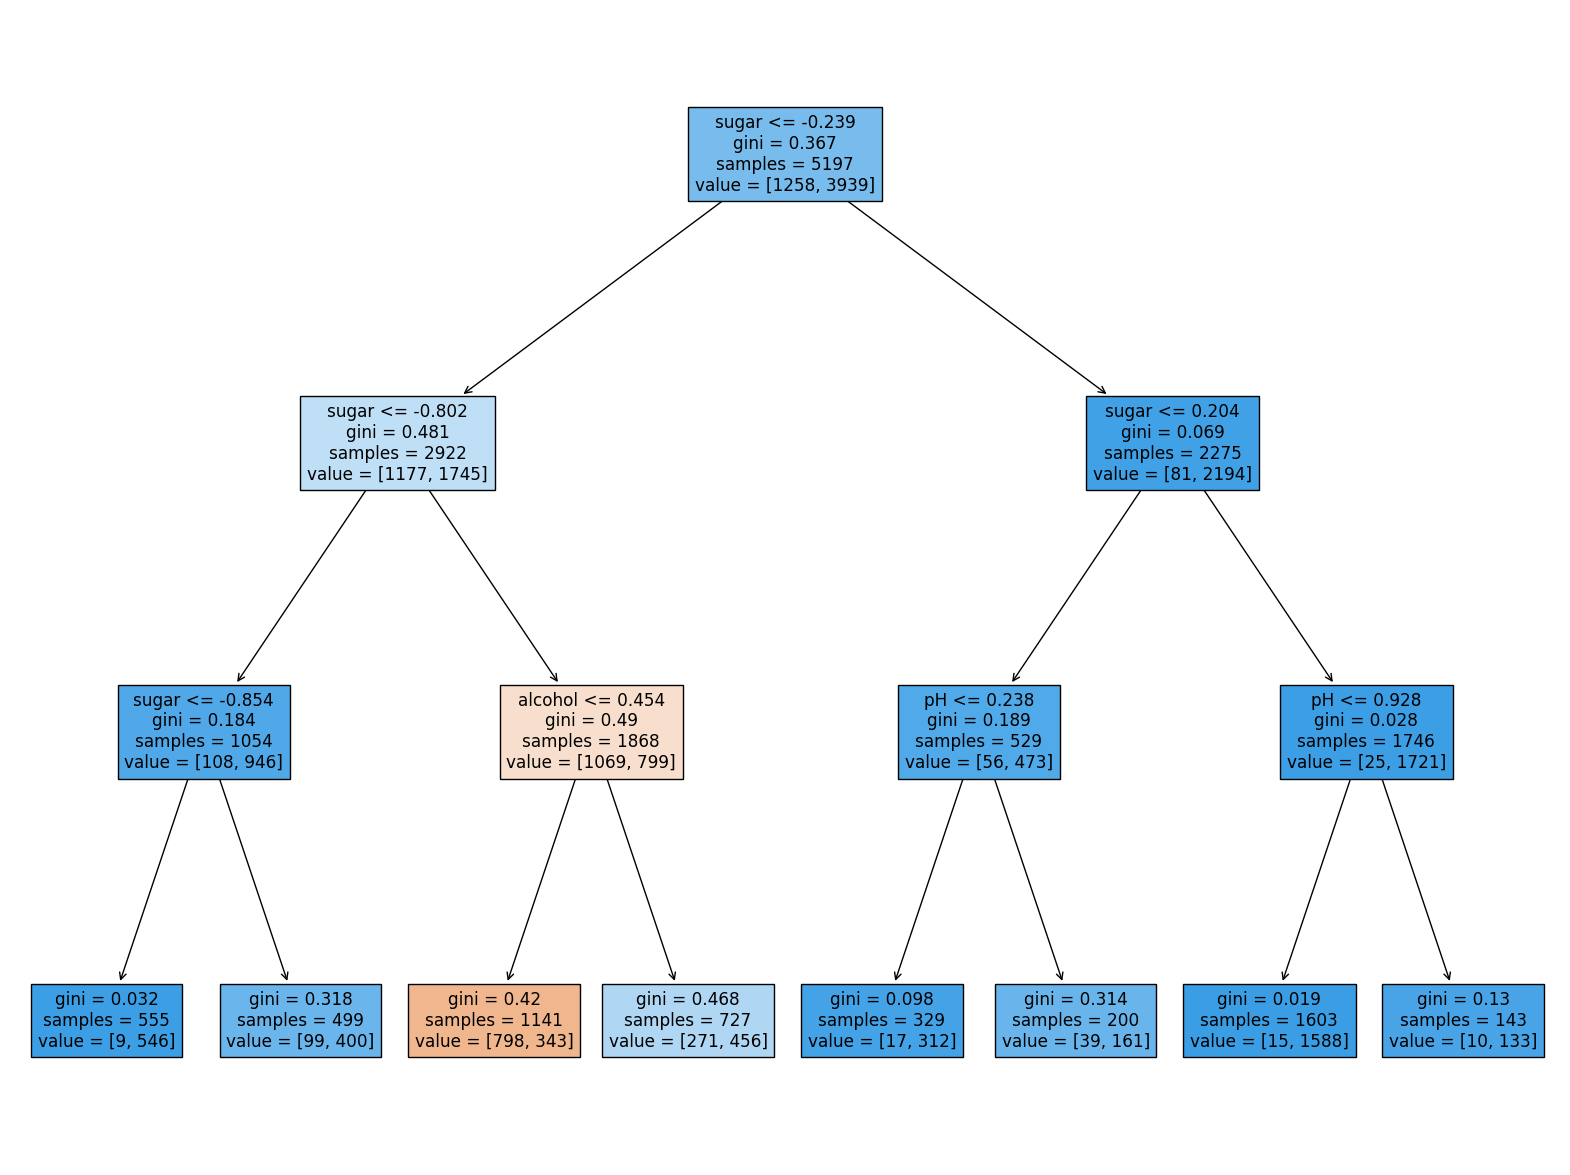

In [ ]:
#깊이가 3인 결정트리의 형태를 그래프로 출력해준다
plt.figure(figsize=(20,15))

plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])

plt.show()

# 검증 데이터

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
#훈련데이터를 다시 훈련데이터와 검증데이터로 나누어준다
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [ ]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [ ]:
from sklearn.model_selection import cross_validate
#교차검증을 사용하는 코드
scores =cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.04151869, 0.04031038, 0.05494189, 0.04199219, 0.01953173]), 'score_time': array([0.00175834, 0.02472043, 0.006778  , 0.0017345 , 0.04688025]), 'test_score': array([0.86634615, 0.86442308, 0.8825794 , 0.85370549, 0.87584216])}


In [ ]:
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
from sklearn.model_selection import StratifiedKFold
#KFold 방식으로 교차 검증한다
scores=cross_validate(dt, train_input, train_target, cv=StratifiedKFold())

In [ ]:
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
splitter=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores=cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


# 최적의 하이퍼파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
#그리드서치에 입력한 파라미터 값을 넣어준다
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)


In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dt=gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(20, 51),
          'min_samples_split': range(2,26),
          'min_samples_leaf': range(1,26),
          }
#랜덤서치에 넣을 파라미터값들은 범위로도 입력 가능하다

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#랜덤서치CV를 통해 최적의 파라미터를 탐색하며 모델을 훈련시킨다
rs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                      n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(20, 51),
                                        'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'min_samples_leaf': range(1, 26),
                                        'min_samples_split': range(2, 26)},
                   random_state=42)

In [ ]:
print(rs.best_params_)

{'min_samples_split': 18, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0004, 'max_depth': 39}


In [ ]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8685792552010069


In [ ]:
dt=rs.best_estimator_

print(dt.score(test_input, test_target))

0.8592307692307692


# 과제

In [ ]:
#그리드 서치에 for 문 적용해서 촘촘하게 하이퍼 파라미터 탐색
#랜덤서치에 함수 적용

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [ ]:
#더 다양한 하이퍼 파라미터를 탐색하기 위해 많은 값을 넣어주었다
params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15]})

In [ ]:
dt=gs.best_estimator_
print(dt.score(train_input, train_target))

0.91495093323071


In [ ]:
#randint를 이용해 랜덤한 정수값을 받도록 했다
param_dist = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                      n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15]},
                   random_state=42)

In [ ]:
dt=gs.best_estimator_
print(dt.score(train_input, train_target))

0.91495093323071
